In [1]:
import site
import pickle as pkl
import h5py as hp
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import copy
import seaborn
def siteFG():
    FGPATH = '/home/cosinga/figrid/'
    site.addsitedir(FGPATH)
    return

def trgba(attr, value, alpha = 1.0):
    return mpl.colors.to_rgba(ds.attr_args[attr][value]['color'], alpha)
siteFG()
from figrid.data_sort import DataSort
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.family'] = 'serif'
plt.rcParams['text.usetex'] = True
THBIAS = r'$b_{\mathrm{HI}} (k) = P_{\mathrm{HI-m}} (k) / P_{\mathrm{m}} (k)$'
OBSBIAS = r"$b_{\mathrm{HI}} (k) = \sqrt{P_{\mathrm{HI}} (k) / P_{\mathrm{m}} (k)}$"
CORRCOEF = r'r (k) = $\frac{\mathrm{P}_{\mathrm{HI-m}}(k)}{\sqrt{\mathrm{P}_{\mathrm{HI}}(k) \mathrm{P}_{\mathrm{m}}(k)}}$'

In [2]:
ds = pkl.load(open('/home/cosinga/hcolor/fig_md_analysis/bias_results.pkl', 'rb'))
print(ds.getAttrs())
XLAB = 'k (cMpc/h)$^{-1}$'
YLAB = 'P$_{%s}$ (k) (cMpc/h)$^{-3}$'
ds.tickArgs({'direction':'in', 'labelsize':12})
ds.legendArgs({'frameon':False, 'loc':'upper right', 'fontsize':12}, slc = (0,0))
ds.rowLabelArgs(pos = [0.05, 0.05], txtkw = {'fontsize':16, 'ha':'left', 'va':'bottom'})
ds.colLabelArgs(pos = [0.5, 0.95], txtkw = {'fontsize':16, 'ha':'center', 'va':'top'})
ds.axisArgs({'xscale':'log', 'yscale':'log', 'xlim':[0.11866199299595938, 20]})
ds.axisLabelArgs('both', {'fontsize':16})
ds.setOrder('space', ['real', 'redshift', 'rsd'])
ds.setOrder('snapshot', [99, 67])
ds.displayAs('space', ['real', 'redshift', 'rsd'], ['Real Space', 'Redshift Space', 'Redshift Space\nDistortions'])
ds.displayAs('HI_fieldname', ['hisubhalo', 'vn', 'hiptl'], ['Galaxy Centers', 'All Particles', 'Particles in Galaxies'])
ds.displayAs('fieldname', ['hisubhalo', 'vn', 'hiptl', 'ptl'], ['Galaxy Centers', 'All Particles', 'Particles in Galaxies', 'Matter'])
ds.displayAs('snapshot', [99, 67], ['z = 0.0', 'z = 0.5'])
ds.displayAs('color', ['red', 'blue', 'resolved', 'ratio'],
            ['HI $\\times$ Red\nCross-Power', 'HI $\\times$ Blue\nCross-Power',
            '', r'Color Ratio'])
ds.plotArgs('color', 'red', {'color':'red'})
ds.plotArgs('color', 'blue', {'color':'blue'})
ds.plotArgs('space', 'real', {'color':'green'})
ds.plotArgs('space', 'redshift', {'color':'orange'})
ds.plotArgs('HI_fieldname', 'hiptl', {'color':'saddlebrown'})
ds.plotArgs('HI_fieldname', 'vn', {'color':'firebrick'})
ds.plotArgs('HI_fieldname', 'hisubhalo', {'color':'sandybrown'})
ds.plotArgs('fieldname', 'hiptl', {'color':'saddlebrown'})
ds.plotArgs('fieldname', 'vn', {'color':'firebrick'})
ds.plotArgs('fieldname', 'hisubhalo', {'color':'sandybrown'})

['path', 'result_runtime', 'is_auto', 'box', 'simname', 'sim_resolution', 'num_part', 'grid_resolution', 'snapshot', 'redshift', 'axis', 'fieldname', 'is_hydrogen', 'is_atomic', 'is_molecular', 'is_particle', 'is_groupcat', 'is_matter', 'mas', 'space', 'compute_xi', 'compute_slice', 'map', 'model', 'HI_fieldname', 'color', 'gal_species', 'gal_res', 'color_cut', 'ptl_species', 'projection', 'HI_res', 'censat', 'post_process', 'numerator', 'denominator']


# HI-Galaxy Z-evo

In [52]:
%%capture
ip = {'is_auto':False, 'color_cut':'0.60', 'space':['real', 'redshift'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['blue', 'red', 'ratio'], 'post_process':'no key found'}
fg = ds.figrid('snapshot', 'space', 'color', ip, figrid_args = {'wspace':[0.1, 0.5], 'hspace':[0.1]})


ip = {'is_auto':False, 'color_cut':'0.60', 'space':['rsd'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['blue', 'red'], 'post_process':'no key found'}
rsdfg = ds.figrid('snapshot', 'space', 'color', ip)
rsdfg.row_labels = ['']
rsdfg.col_labels = ['HI $\\times$ Blue RSD', 'HI $\\times$ Red RSD']

ip = {'is_auto':False, 'color_cut':'0.60', 'space':['rsd'], 'HI_fieldname':['vn', 'hiptl'],
     'path':'fiducial', 'color':['blue', 'red'], 'post_process':'no key found', 'snapshot':99}
onefg = ds.figrid('color', '', '', ip)
onefg.plotArgs({'color':'blue'}, {'label':'HI $\\times$ Blue RSD', 'color':'blue'})
onefg.plotArgs({'color':'red'}, {'label':'HI $\\times$ Red RSD', 'color':'red'})
onefg.autoFill({'alpha':0.8})

colors = ['blue', 'red', 'ratio']
snapshots = ds.getAttrVals('snapshot')
snapshots.reverse()
redcols = seaborn.color_palette('Reds', len(snapshots))
bluecols = seaborn.color_palette('Blues', len(snapshots))
ratcols = seaborn.color_palette('Purples', len(snapshots))
coldict = {'red':redcols, 'blue':bluecols, 'ratio':ratcols}
for c in colors:
    for s in range(len(snapshots)):
        args = {'color':coldict[c][s]}
        panels.append((2, 0)); panels.append((2, 1))
        fg.plotArgs({'color':c, 'snapshot':snapshots[s]}, args)
        rsdfg.plotArgs({'color':c, 'snapshot':snapshots[s]}, args)

fg.autoFill({'alpha':0.6})
rsdfg.autoFill({'alpha':0.6})

ds.combineFigrids(rsdfg, onefg, loc = 'right', spacing = 0.5)

ds.combineFigrids(fg, rsdfg, spacing = 0.25)


[3. 3. 3.]
[0.   0.99]
[0.3  0.75]


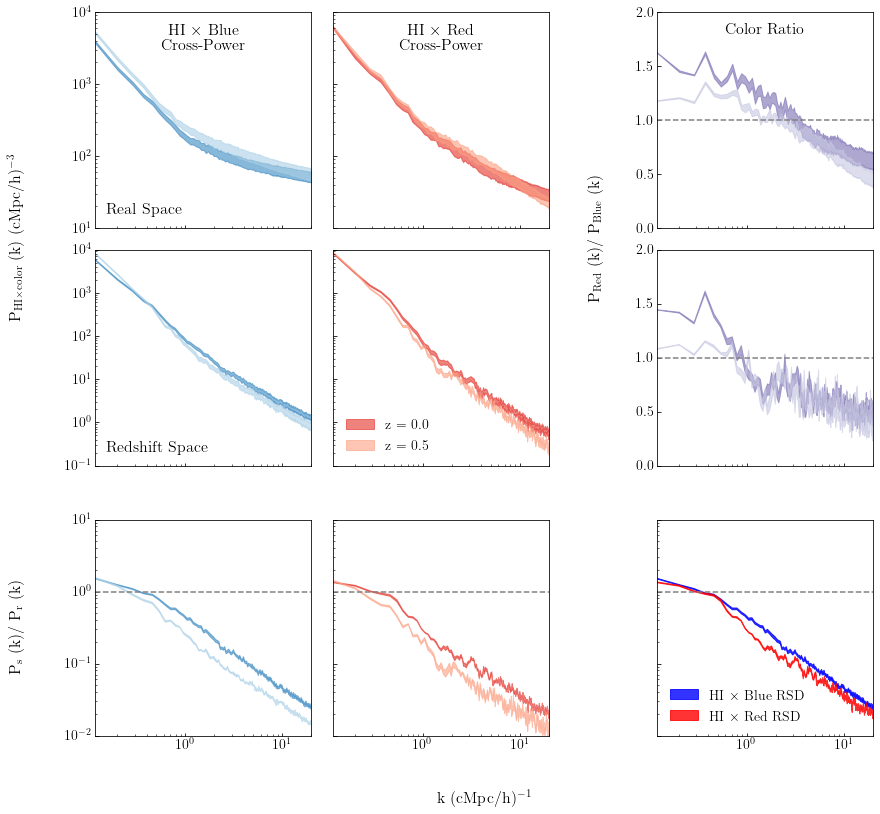

In [53]:
realpk = [(0, 0), (0, 1)]
redpk = [(1, 0), (1, 1)]
pks = realpk + redpk
ratios = [(0, 2), (1, 2)]
rsd = [(2, 0), (2, 1), (2, 2)]
    
fg.legendArgs({'fontsize':14, 'loc':'lower left'}, [(1,1), (2,2)])

# axis args
fg.axisArgs({'ylim':(1e1, 1e4)}, realpk)
fg.axisArgs({'ylim':(1e-1, 1e4)}, redpk)
fg.axisArgs({'yscale':'linear', 'ylim':(0, 2)}, ratios)
fg.axisArgs({'ylim':(1e-2, 10)}, rsd)

# tick args
fg.tickArgs({'labelsize':14})
fg.tickArgs({'labelbottom':False}, slc = (slice(0,2), slice(None)))
fg.tickArgs({'labelleft':False}, slc = (slice(None), 1))
fg.tickArgs({'labelleft':False}, slc = (2, 2))

# axis labels
fg.setXLabel(XLAB)
ypos = [0, 1 - (fg.panel_heights[0] + fg.yborder[0] + 0.5 * fg.hspace[0])/fg.figsize[1]]
fg.annotateFig(YLAB%r"\mathrm{HI} \times \mathrm{color}", ypos, {'rotation':'vertical', 'va':'center', 'ha':'right', 'fontsize':16})
ypos = [(np.sum(fg.panel_widths[:2]) + fg.wspace[0] + fg.xborder[0] + 0.5 * fg.wspace[1])/fg.figsize[0], ypos[1]]
fg.annotateFig(r"P$_{\mathrm{Red}}$ (k)/ P$_{\mathrm{Blue}}$ (k)", ypos, {'rotation':'vertical', 'va':'center', 'ha':'right', 'fontsize':16})
ypos = [0, (0.5*fg.panel_heights[-1] + fg.yborder[1])/fg.figsize[1]]
fg.annotateFig(r"P$_{\mathrm{s}}$ (k)/ P$_{\mathrm{r}}$ (k)", ypos, {'rotation':'vertical', 'va':'center', 'ha':'right', 'fontsize':16})
for idx in (ratios + rsd):
    xlim = fg.axes[idx].get_xlim()
    fg.axes[idx].plot(xlim, [1,1], color = 'gray', linestyle = 'dashed')
    
# custom column labels
fg.annotateAxis("HI $\\times$ Blue RSD", [0.5, 0.95], (2, 0), text_kwargs = {'ha':'center', 'va':'top', 'fontsize':})
fg.plot()
fg.fig